# **1.** Imports

In [43]:
# Data Manipulation, Visualization and Machine Learning
# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import PolynomialFeatures


from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor


# **2.** Data Exploration and Preprocessing

## **2.1.** Loading Dataset

In [44]:
# Load the dataset
data = pd.read_csv('/kaggle/input/data-patient-dropout/data_patient_dropout.csv')

# Display the first Fifteen rows of the dataset
data.head(15)

,Patient ID,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
0,ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1
5,ID_5,Yes,13,6.0,0,0.0,0,1,1,0,5,1,1
6,ID_6,No,14,4.0,1,0.0,1,1,1,0,0,1,0
7,ID_7,No,7,1.0,0,NaN,0,1,1,0,3,0,1
8,ID_8,No,13,8.0,1,NaN,0,0,1,0,1,1,1
9,ID_9,No,17,4.0,1,NaN,1,2,2,1,1,1,0


### **2.1.1.** Shape of Dataset

In [45]:
# Check number of rows and number of columns
data.shape

(4284, 13)

In [46]:
# Check dataset information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient ID                                 4284 non-null   object 
 1   Initial Consultation Attended              4284 non-null   object 
 2   Number of Treatment Sessions Attended      4284 non-null   int64  
 3   Number of Treatment Goals Set              4275 non-null   float64
 4   Number of Treatment Goals Revised          4284 non-null   int64  
 5   Number of Progress Reviews Attended        4275 non-null   float64
 6   Number of Times Treatment Plan Confirmed   4284 non-null   int64  
 7   Number of Times Treatment Phase Initiated  4284 non-null   int64  
 8   Number of Treatment Options Explored       4284 non-null   int64  
 9   Number of Times Logged Into Health Portal  4284 non-null   int64  
 10  Number of Educational Re

### **2.1.2.** Checking Missing Values

In [47]:
# Check any missing values
data.isnull().sum()

Patient ID                                   0
Initial Consultation Attended                0
Number of Treatment Sessions Attended        0
Number of Treatment Goals Set                9
Number of Treatment Goals Revised            0
Number of Progress Reviews Attended          9
Number of Times Treatment Plan Confirmed     0
Number of Times Treatment Phase Initiated    0
Number of Treatment Options Explored         0
Number of Times Logged Into Health Portal    0
Number of Educational Resources Viewed       0
Patient Segment Type                         0
Treatment Dropped                            0
dtype: int64

## **2.2.** Handling Missing Values

In [48]:
# Calculate the mean of columns with missing values
mean_values = data[['Number of Treatment Goals Set', 'Number of Progress Reviews Attended']].mean()

# Fill NaN values in these columns with the mean values
data[['Number of Treatment Goals Set', 'Number of Progress Reviews Attended']] = data[['Number of Treatment Goals Set', 'Number of Progress Reviews Attended']].fillna(mean_values)
data.isnull().sum()

Patient ID                                   0
Initial Consultation Attended                0
Number of Treatment Sessions Attended        0
Number of Treatment Goals Set                0
Number of Treatment Goals Revised            0
Number of Progress Reviews Attended          0
Number of Times Treatment Plan Confirmed     0
Number of Times Treatment Phase Initiated    0
Number of Treatment Options Explored         0
Number of Times Logged Into Health Portal    0
Number of Educational Resources Viewed       0
Patient Segment Type                         0
Treatment Dropped                            0
dtype: int64

In [49]:
# Display the cleaned data
print("\nCleaned Data:")
data.head(15)


Cleaned Data:


,Patient ID,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
0,ID_0,Yes,4,1.000000,0,0.000000,0,0,1,0,0,0,1
1,ID_1,No,38,0.000000,0,2.000000,0,0,2,0,2,0,1
2,ID_2,No,8,5.000000,0,0.000000,1,1,1,0,0,1,0
3,ID_3,No,6,0.000000,0,2.000000,0,0,4,0,0,0,1
4,ID_4,Yes,31,14.000000,12,1.000000,0,0,4,0,0,2,1
5,ID_5,Yes,13,6.000000,0,0.000000,0,1,1,0,5,1,1
6,ID_6,No,14,4.000000,1,0.000000,1,1,1,0,0,1,0
7,ID_7,No,7,1.000000,0,1.444211,0,1,1,0,3,0,1
8,ID_8,No,13,8.000000,1,1.444211,0,0,1,0,1,1,1
9,ID_9,No,17,4.000000,1,1.444211,1,2,2,1,1,1,0


## **2.3.** Dropping unnecessary columns

In [50]:
data = data.drop(columns=['Patient ID'])

## **2.4.** Feature Scaling

In [51]:
# Identify numeric columns
numeric_cols = [
    'Number of Treatment Sessions Attended',
    'Number of Treatment Goals Set',
    'Number of Treatment Goals Revised',
    'Number of Progress Reviews Attended',
    'Number of Times Treatment Plan Confirmed',
    'Number of Times Treatment Phase Initiated',
    'Number of Treatment Options Explored',
    'Number of Times Logged Into Health Portal',
    'Number of Educational Resources Viewed',
    'Patient Segment Type',
    'Treatment Dropped'
]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max scaling on the numeric columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Display the first few rows of the scaled DataFrame
print("Scaled Data \n")
data.head(15)

Scaled Data 



,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
0,Yes,0.009174,0.004444,0.00,0.000000,0.000000,0.000000,0.003906,0.000000,0.000000,0.0,1.0
1,No,0.087156,0.000000,0.00,0.058824,0.000000,0.000000,0.007812,0.000000,0.057143,0.0,1.0
2,No,0.018349,0.022222,0.00,0.000000,0.090909,0.071429,0.003906,0.000000,0.000000,0.5,0.0
3,No,0.013761,0.000000,0.00,0.058824,0.000000,0.000000,0.015625,0.000000,0.000000,0.0,1.0
4,Yes,0.071101,0.062222,0.24,0.029412,0.000000,0.000000,0.015625,0.000000,0.000000,1.0,1.0
5,Yes,0.029817,0.026667,0.00,0.000000,0.000000,0.071429,0.003906,0.000000,0.142857,0.5,1.0
6,No,0.032110,0.017778,0.02,0.000000,0.090909,0.071429,0.003906,0.000000,0.000000,0.5,0.0
7,No,0.016055,0.004444,0.00,0.042477,0.000000,0.071429,0.003906,0.000000,0.085714,0.0,1.0
8,No,0.029817,0.035556,0.02,0.042477,0.000000,0.000000,0.003906,0.000000,0.028571,0.5,1.0
9,No,0.038991,0.017778,0.02,0.042477,0.090909,0.142857,0.007812,0.333333,0.028571,0.5,0.0


## **2.5.** Encoding Categorical Variables

In [52]:
# Map 'Yes' to 1 and 'No' to 0
data['Initial Consultation Attended'] = data['Initial Consultation Attended'].map({'Yes': 1, 'No': 0})

# Display the updated DataFrame
print("Updated Data with Numerical Encoding \n")
data.head(15)


Updated Data with Numerical Encoding 



,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
0,1,0.009174,0.004444,0.00,0.000000,0.000000,0.000000,0.003906,0.000000,0.000000,0.0,1.0
1,0,0.087156,0.000000,0.00,0.058824,0.000000,0.000000,0.007812,0.000000,0.057143,0.0,1.0
2,0,0.018349,0.022222,0.00,0.000000,0.090909,0.071429,0.003906,0.000000,0.000000,0.5,0.0
3,0,0.013761,0.000000,0.00,0.058824,0.000000,0.000000,0.015625,0.000000,0.000000,0.0,1.0
4,1,0.071101,0.062222,0.24,0.029412,0.000000,0.000000,0.015625,0.000000,0.000000,1.0,1.0
5,1,0.029817,0.026667,0.00,0.000000,0.000000,0.071429,0.003906,0.000000,0.142857,0.5,1.0
6,0,0.032110,0.017778,0.02,0.000000,0.090909,0.071429,0.003906,0.000000,0.000000,0.5,0.0
7,0,0.016055,0.004444,0.00,0.042477,0.000000,0.071429,0.003906,0.000000,0.085714,0.0,1.0
8,0,0.029817,0.035556,0.02,0.042477,0.000000,0.000000,0.003906,0.000000,0.028571,0.5,1.0
9,0,0.038991,0.017778,0.02,0.042477,0.090909,0.142857,0.007812,0.333333,0.028571,0.5,0.0


## **2.6.** Outlier Detection

### **2.6.1.** Boxplot before removing outliers

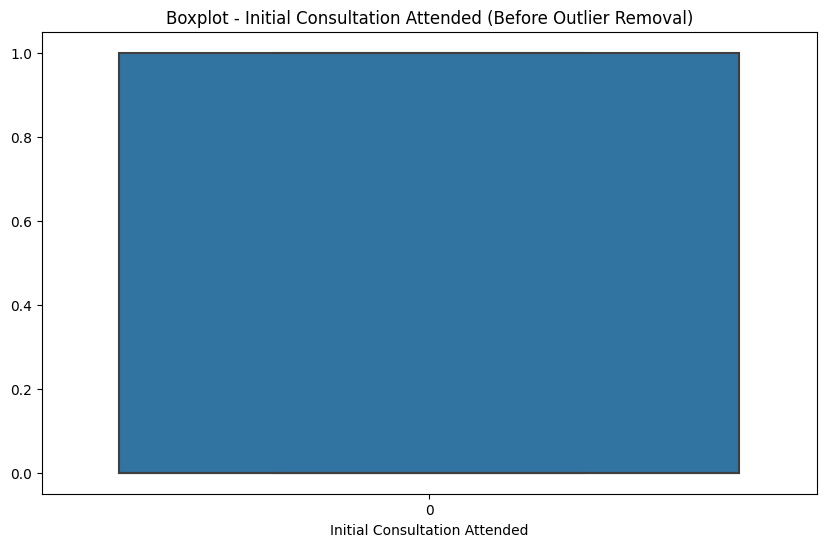

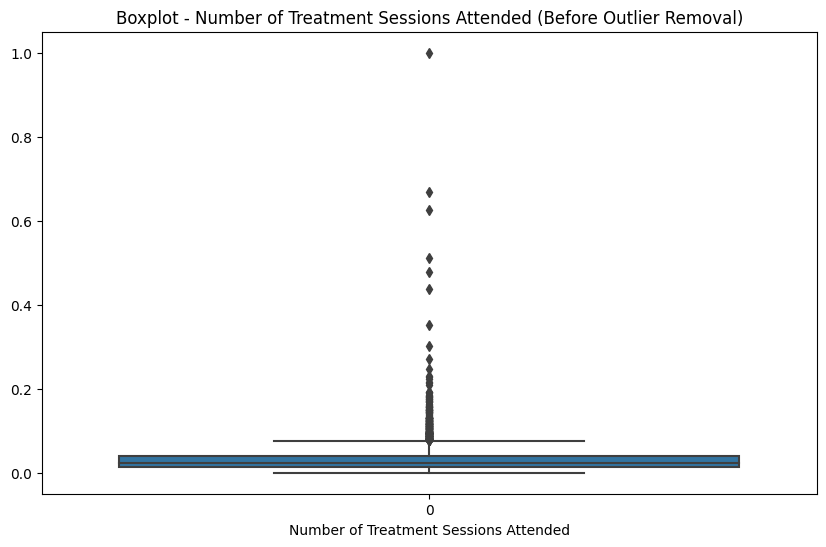

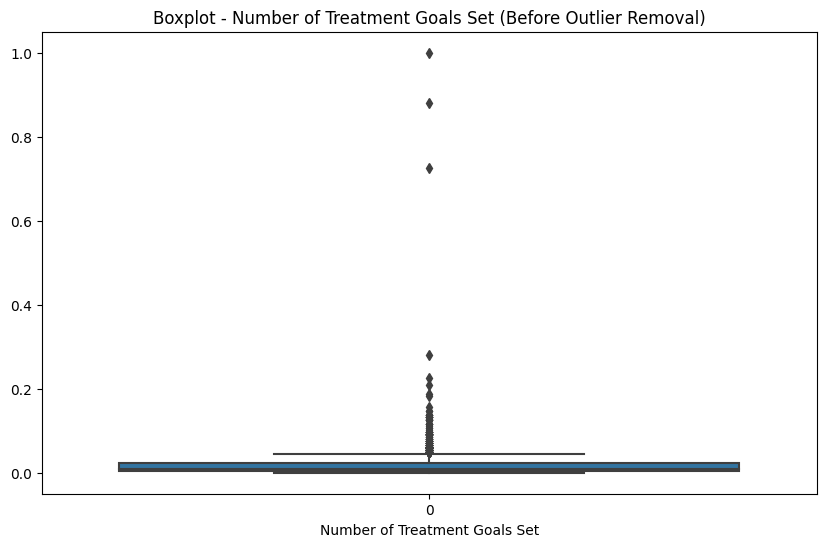

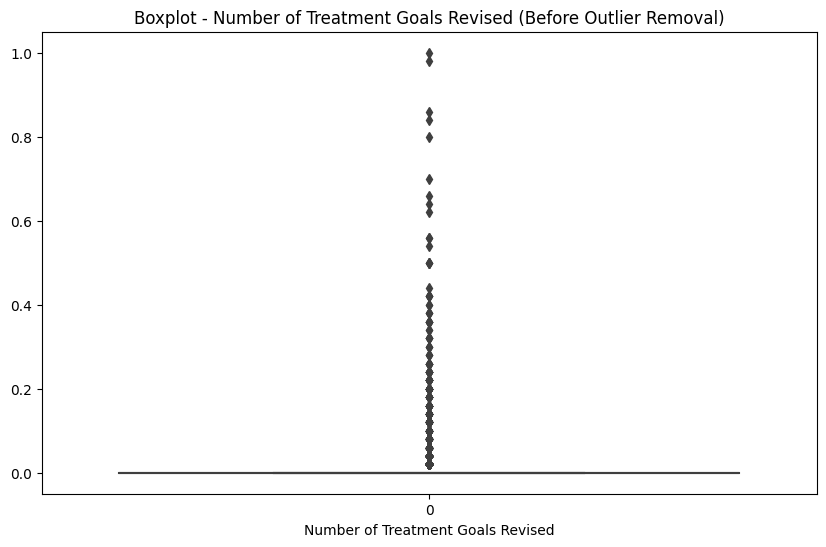

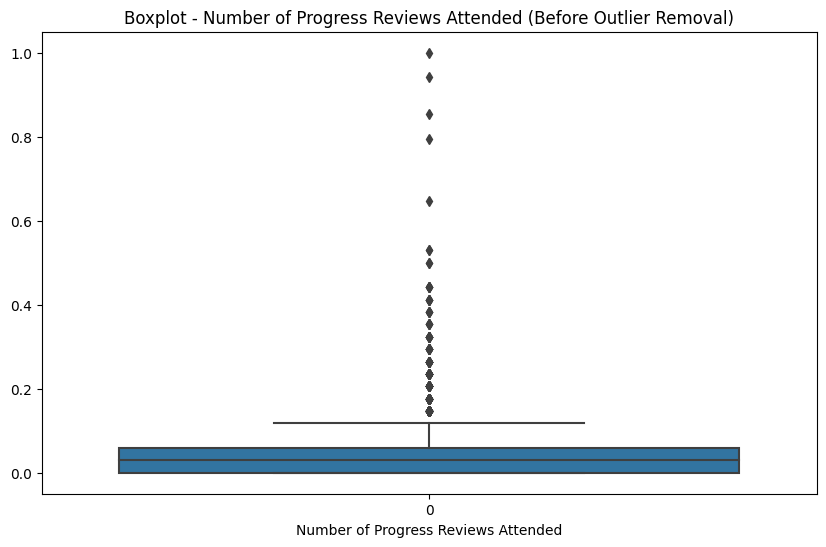

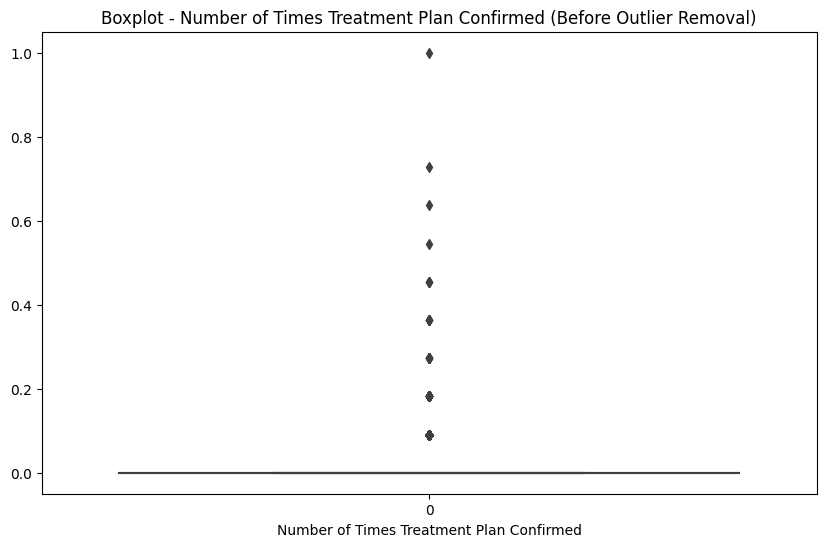

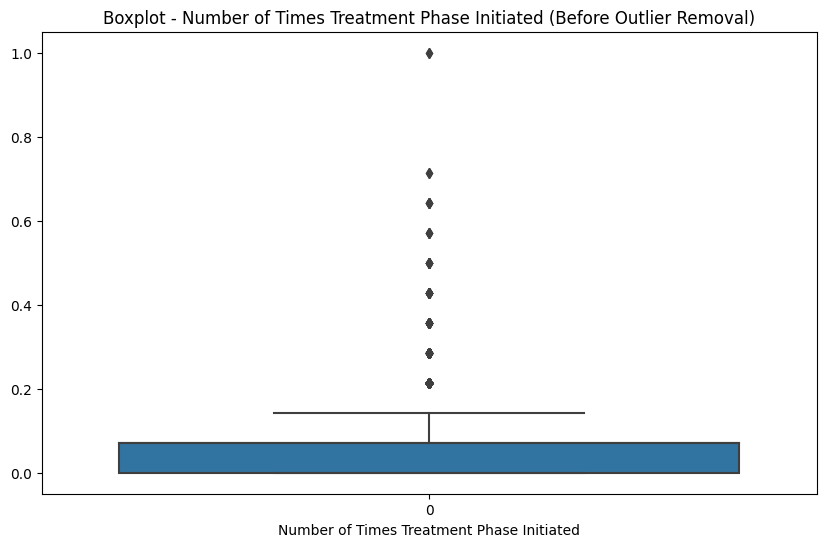

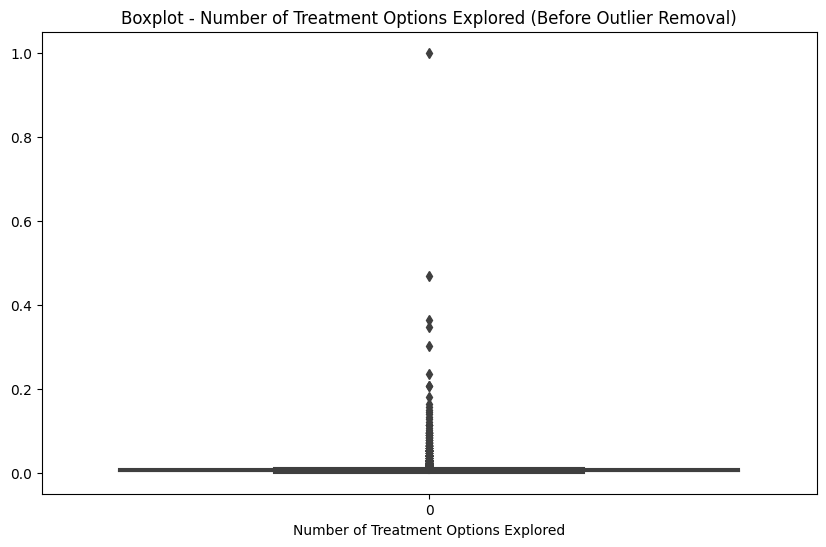

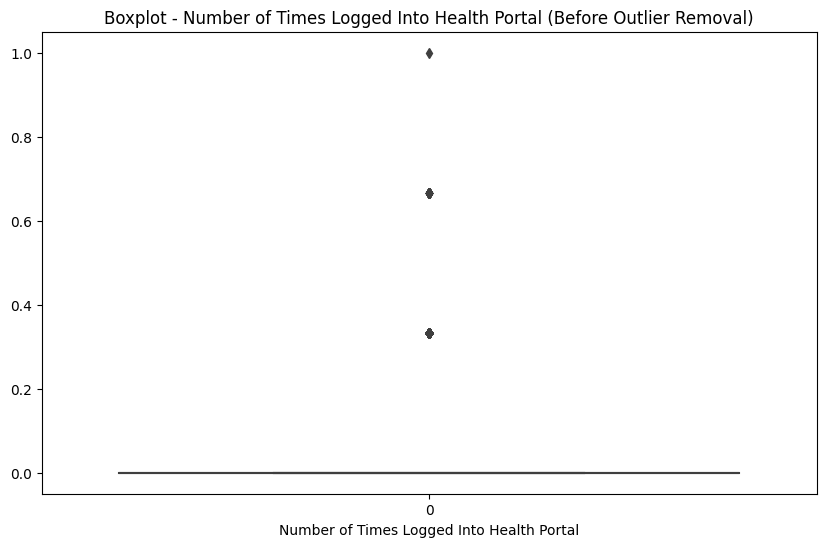

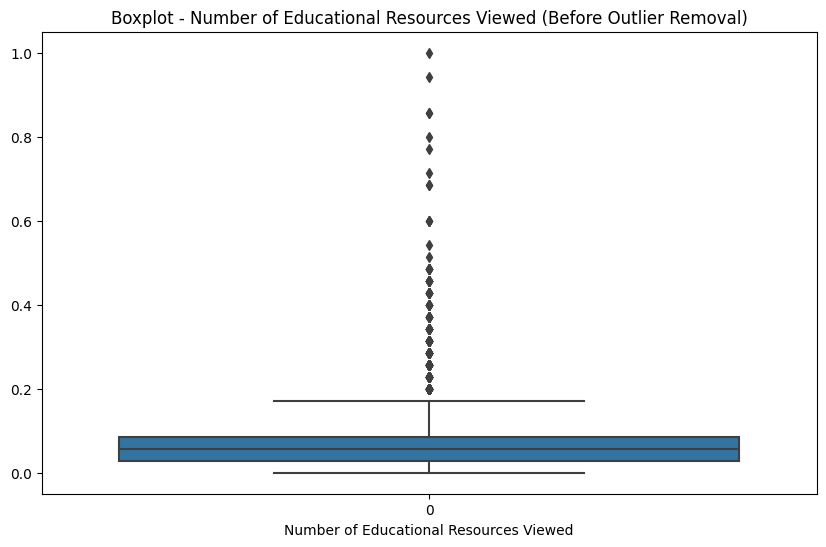

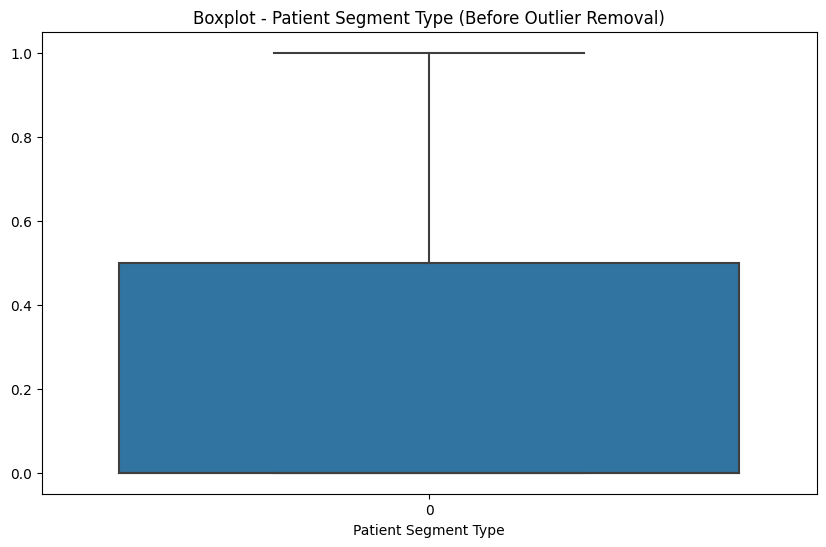

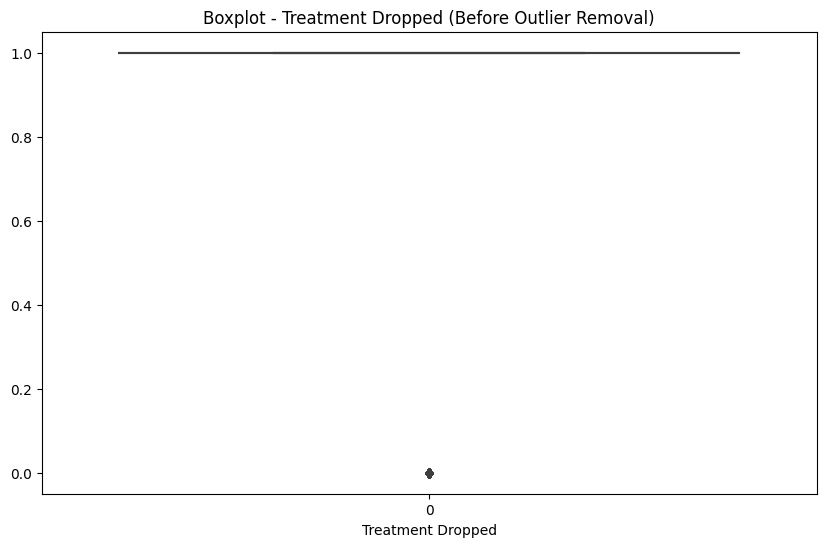

In [53]:
numeric_cols = data.select_dtypes(include=[np.number]).columns

# 1. Boxplot Before Removing Outliers
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data[col])
    plt.title(f'Boxplot - {col} (Before Outlier Removal)')
    plt.xlabel(col)
    plt.show()

### **2.6.2.** Checking Data Distribution before Outlier Removal

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


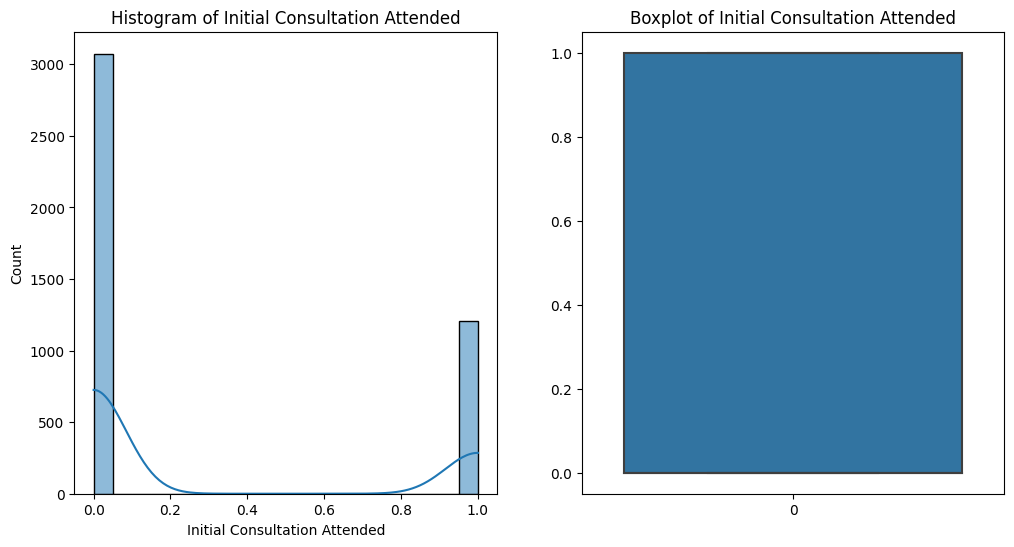

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


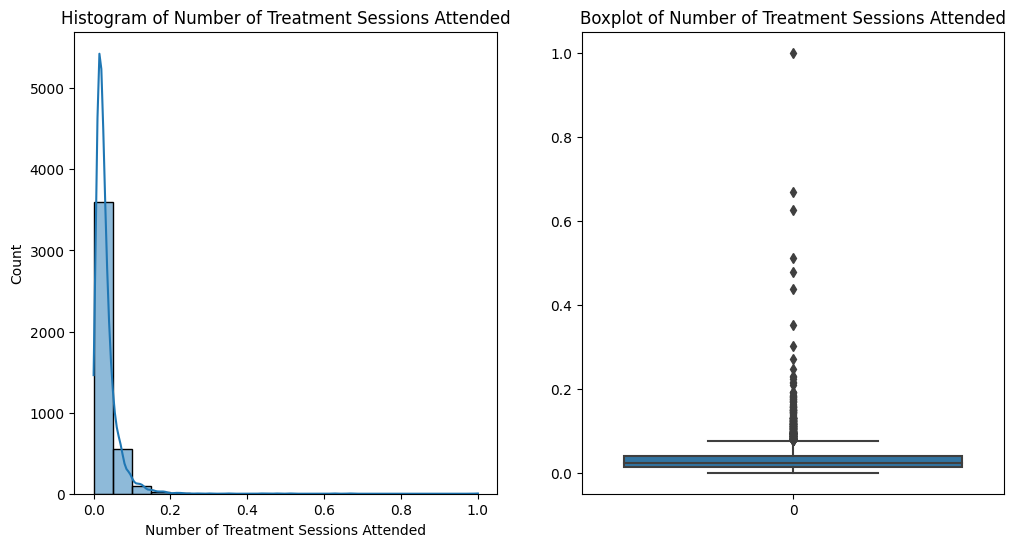

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


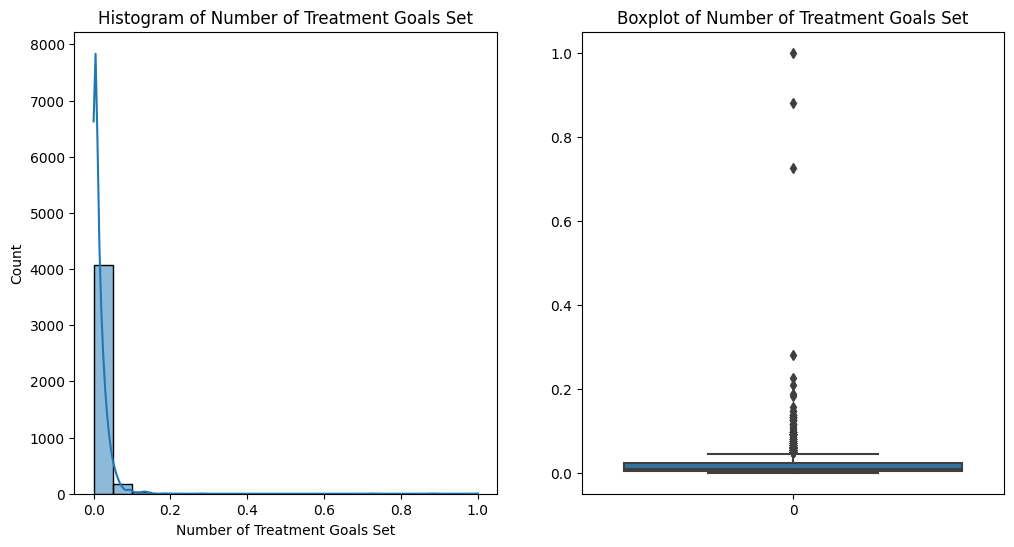

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


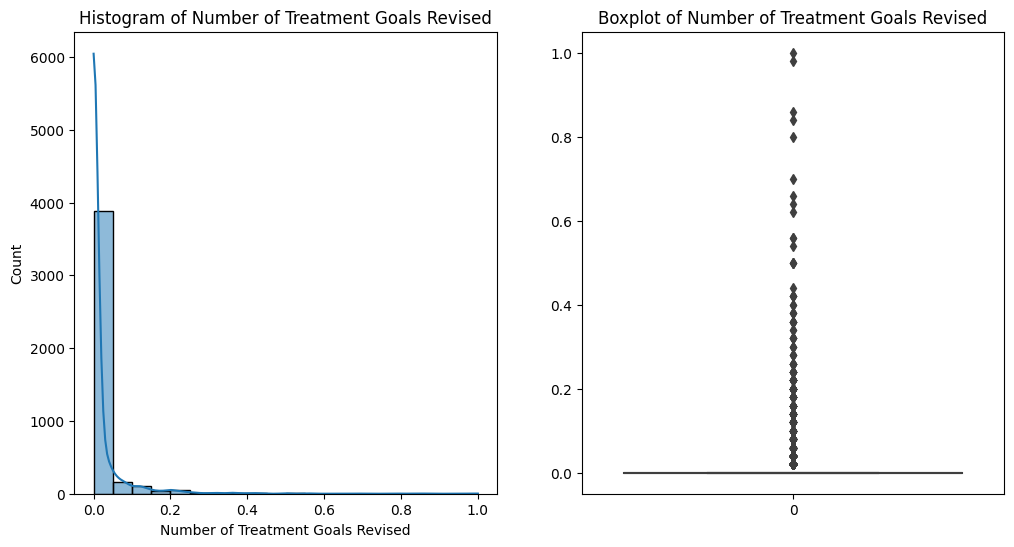

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


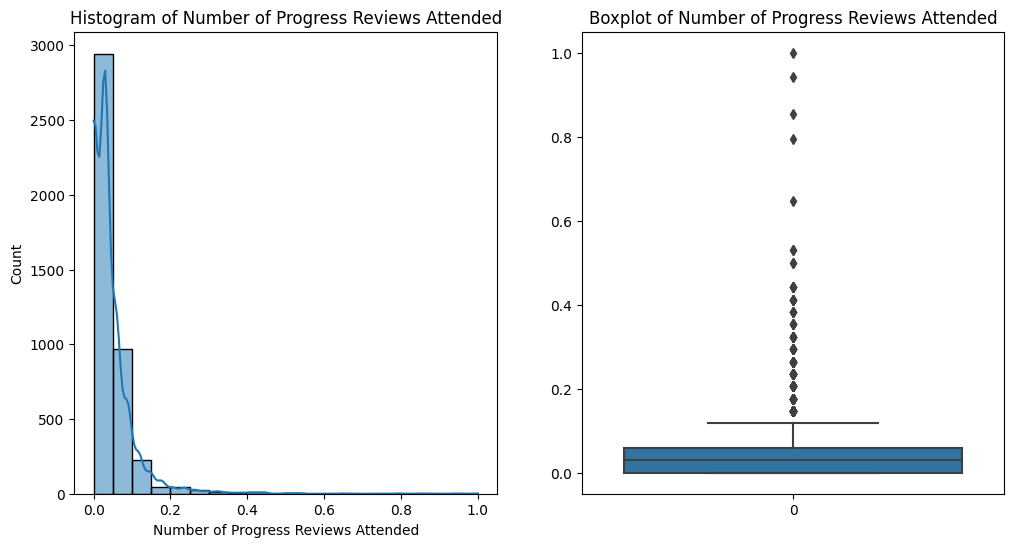

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


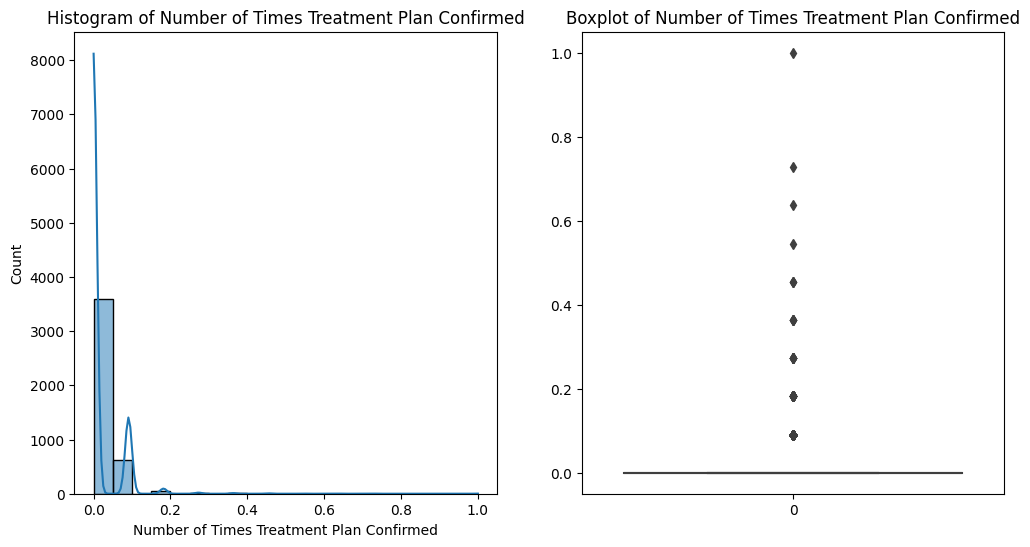

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


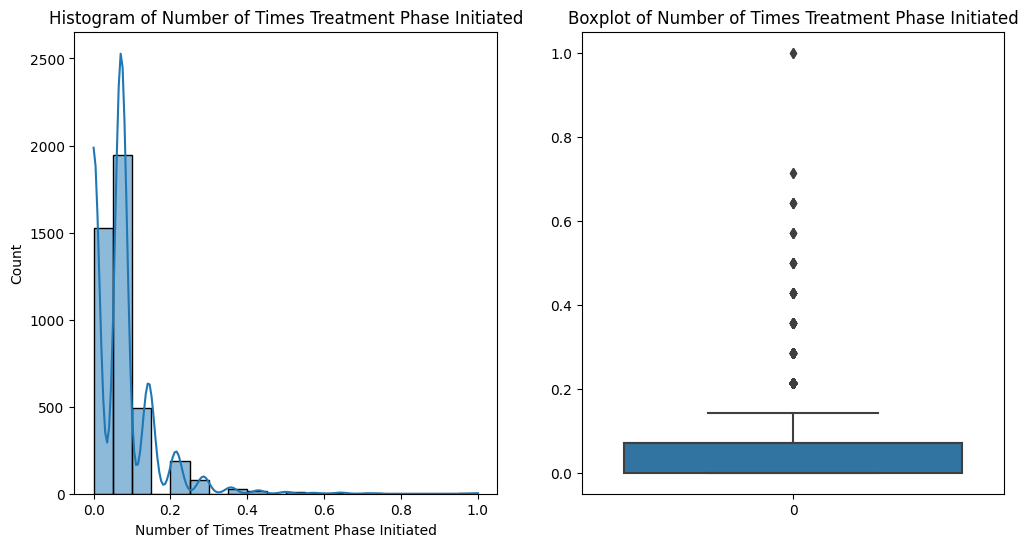

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


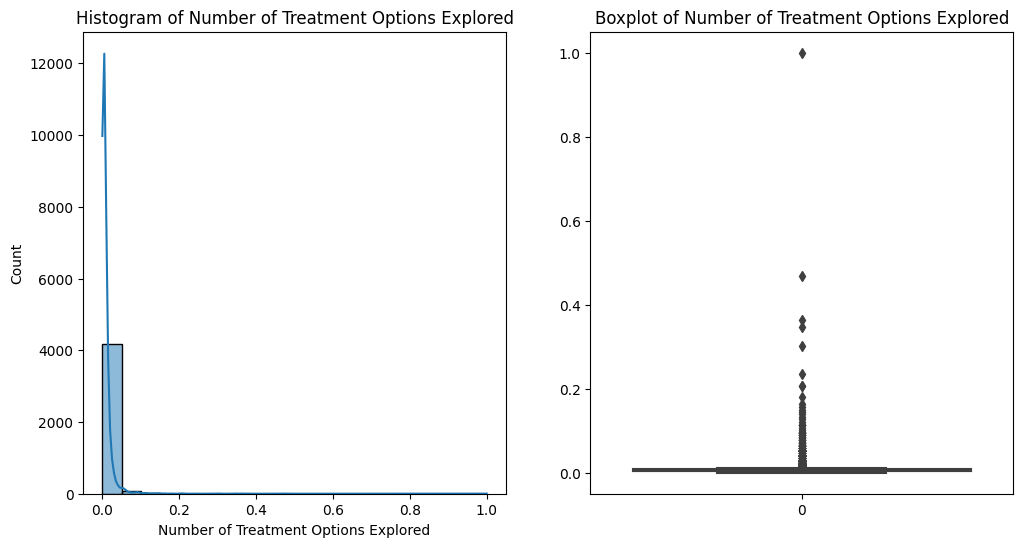

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


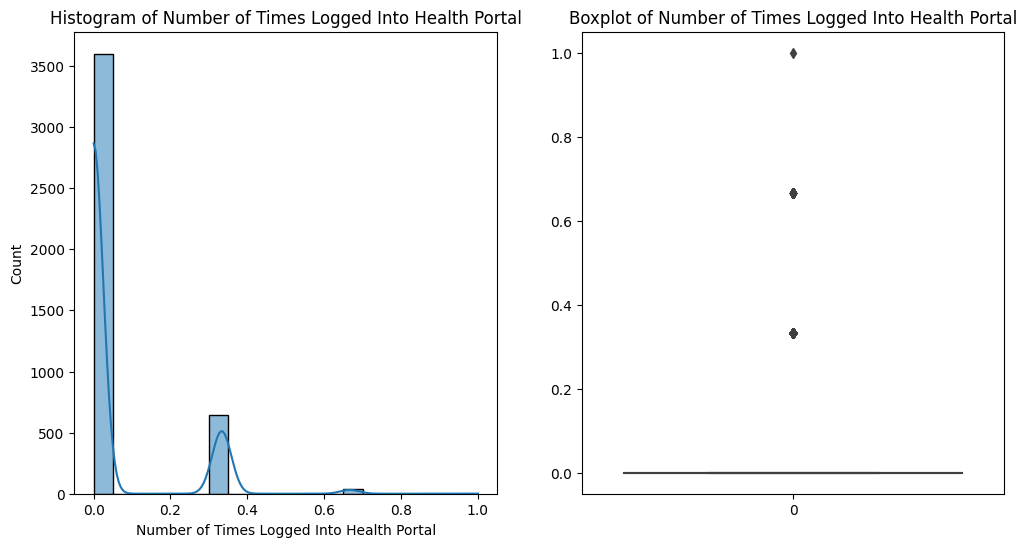

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


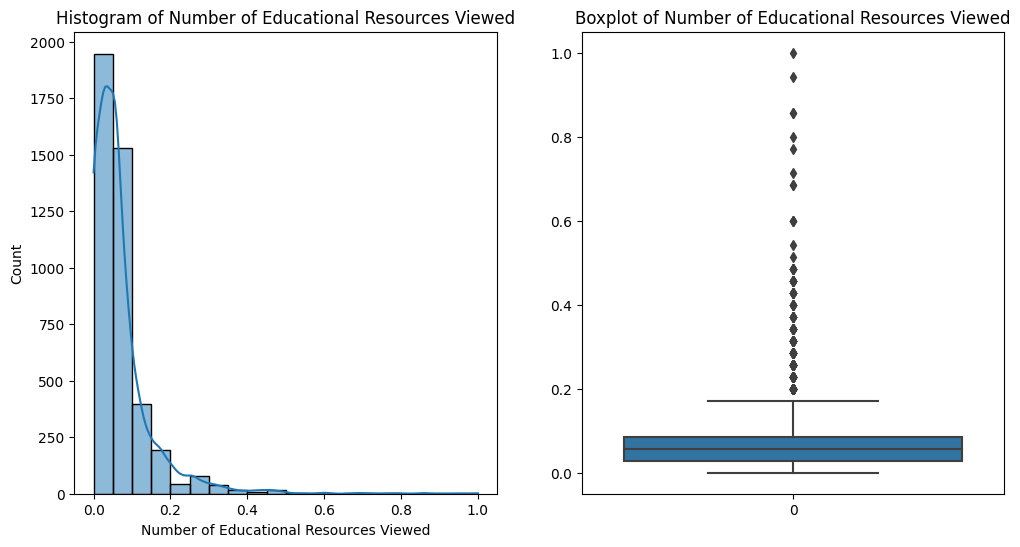

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


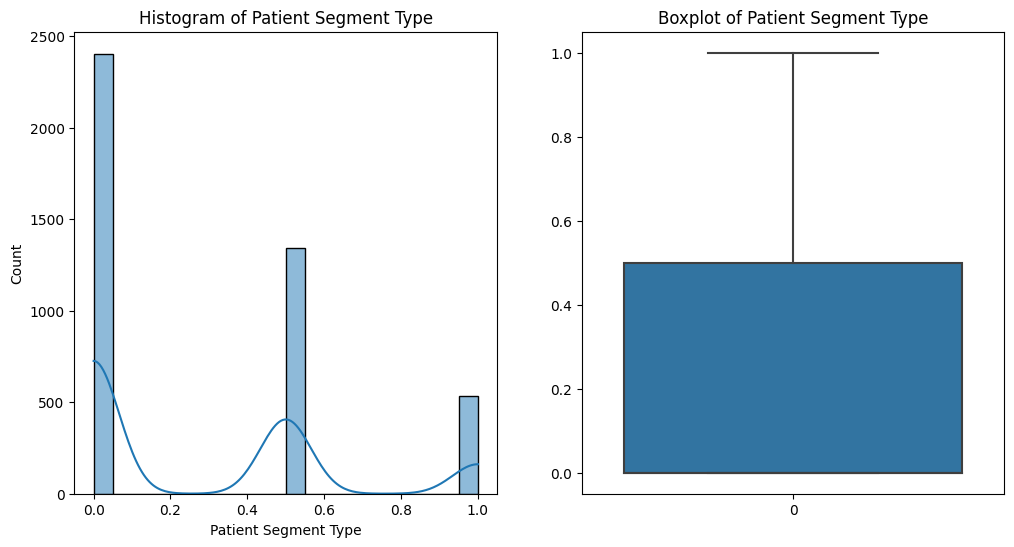

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


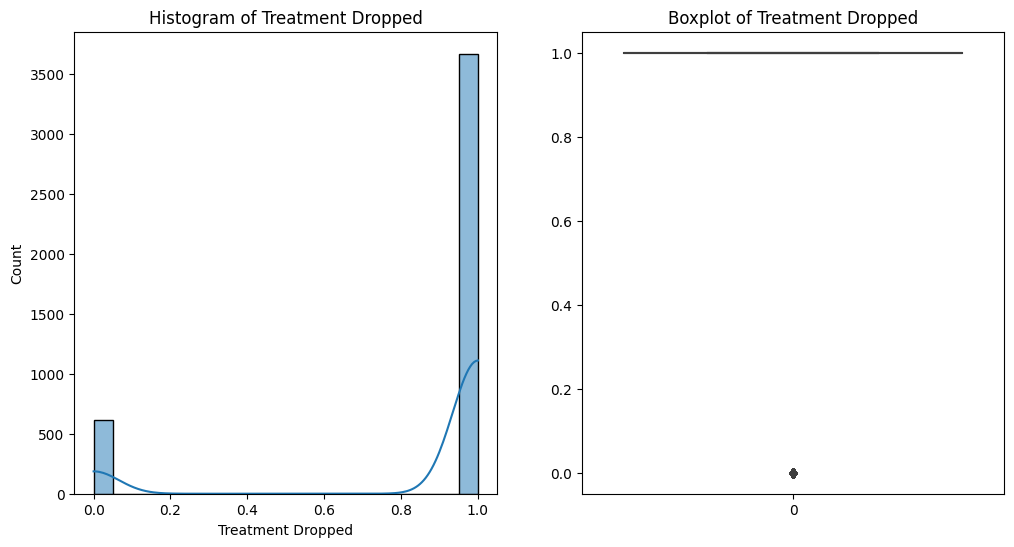

In [54]:
# Visualize the distribution of each numeric column
numeric_cols = data.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()


In [55]:
# Check skewness and kurtosis
for col in data.select_dtypes(include=[np.number]).columns:
    skewness = data[col].skew()
    kurtosis = data[col].kurt()
    print(f'{col}: Skewness = {skewness}, Kurtosis = {kurtosis}')


Initial Consultation Attended: Skewness = 0.966837299375797, Kurtosis = -1.065723391190158
Number of Treatment Sessions Attended: Skewness = 9.192731412758546, Kurtosis = 171.8439932613339
Number of Treatment Goals Set: Skewness = 17.63929738245517, Kurtosis = 497.36045238232566
Number of Treatment Goals Revised: Skewness = 7.264247577792745, Kurtosis = 75.188600561222
Number of Progress Reviews Attended: Skewness = 5.087861007012065, Kurtosis = 48.62639710643515
Number of Times Treatment Plan Confirmed: Skewness = 6.106870149217233, Kurtosis = 77.24272664476939
Number of Times Treatment Phase Initiated: Skewness = 2.8379680731539314, Kurtosis = 16.31782572152465
Number of Treatment Options Explored: Skewness = 22.175313590638684, Kurtosis = 787.4747820596363
Number of Times Logged Into Health Portal: Skewness = 2.235246811824484, Kurtosis = 4.392313915382793
Number of Educational Resources Viewed: Skewness = 3.4930843691486686, Kurtosis = 20.9754912045939
Patient Segment Type: Skewnes

### **2.6.3.** Log Transformation to Reduce Skewness

In [56]:
# Apply log transformation to reduce skewness
data['Number of Treatment Goals Set'] = np.log1p(data['Number of Treatment Goals Set'])
data['Number of Treatment Options Explored'] = np.log1p(data['Number of Treatment Options Explored'])


### **2.6.4.** IQR Method

#### **2.6.4.1.** Identifying outliers

In [57]:
# Assuming data_cleaned is your cleaned DataFrame
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Initialize an empty DataFrame to store the outlier data
outliers_df = pd.DataFrame()

# Loop through all numeric columns to detect outliers using the IQR method
for col in numeric_cols:
    
    if col == 'Treatment Dropped':
        continue  # Skip capping for the target variable
    
    # Calculate Q1 and Q3
    Q1 = data[col].quantile(0.25)  # First quartile
    Q3 = data[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Calculate outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print bounds for reference
    print(f"{col} \n Lower Bound: {lower_bound} \n Upper Bound: {upper_bound}\n\n")

    # Identify outliers for the current column
    outliers = data.loc[(data[col] < lower_bound) | (data[col] > upper_bound)]
    
    # Append outliers to the outliers DataFrame
    outliers_df = pd.concat([outliers_df, outliers])

# Display all detected outliers
print("Detected Outliers Using IQR Method \n")
outliers_df

Initial Consultation Attended 
 Lower Bound: -1.5 
 Upper Bound: 2.5


Number of Treatment Sessions Attended 
 Lower Bound: -0.02408256880733945 
 Upper Bound: 0.07683486238532111


Number of Treatment Goals Set 
 Lower Bound: -0.021881867408498498 
 Upper Bound: 0.04829537119513949


Number of Treatment Goals Revised 
 Lower Bound: 0.0 
 Upper Bound: 0.0


Number of Progress Reviews Attended 
 Lower Bound: -0.08823529411764705 
 Upper Bound: 0.14705882352941174


Number of Times Treatment Plan Confirmed 
 Lower Bound: 0.0 
 Upper Bound: 0.0


Number of Times Treatment Phase Initiated 
 Lower Bound: -0.10714285714285714 
 Upper Bound: 0.17857142857142855


Number of Treatment Options Explored 
 Lower Bound: -0.0019266096239391167 
 Upper Bound: 0.01360739048165139


Number of Times Logged Into Health Portal 
 Lower Bound: 0.0 
 Upper Bound: 0.0


Number of Educational Resources Viewed 
 Lower Bound: -0.05714285714285715 
 Upper Bound: 0.17142857142857143


Patient Segment Type 
 Lower 

,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
1,0,0.087156,0.000000,0.00,0.058824,0.000000,0.000000,0.007782,0.000000,0.057143,0.0,1.0
18,0,0.080275,0.015385,0.16,0.176471,0.000000,0.142857,0.003899,0.333333,0.257143,1.0,1.0
21,0,0.080275,0.060363,0.00,0.088235,0.090909,0.214286,0.011651,0.000000,0.257143,0.5,1.0
46,0,0.087156,0.056170,0.00,0.147059,0.090909,0.000000,0.049534,0.000000,0.028571,0.5,0.0
68,1,0.077982,0.109353,0.10,0.000000,0.000000,0.000000,0.003899,0.000000,0.028571,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4248,1,0.270642,0.125163,0.86,0.500000,0.000000,0.071429,0.030772,0.000000,0.257143,1.0,1.0
4265,1,0.036697,0.004435,0.02,0.000000,0.000000,0.000000,0.015504,0.000000,0.257143,0.0,1.0
4267,0,0.181193,0.093288,0.26,0.411765,0.090909,0.071429,0.015504,0.000000,0.457143,1.0,0.0
4270,0,0.133028,0.000000,0.00,0.235294,0.090909,0.142857,0.011651,0.000000,0.285714,0.0,0.0


#### **2.6.4.2.** Removing outliers

In [58]:
# Specify the columns from which to remove outliers
columns_to_clean = [
    'Number of Treatment Sessions Attended',
    'Number of Treatment Goals Set',
    'Number of Progress Reviews Attended',
    'Number of Times Treatment Phase Initiated',
    'Number of Treatment Options Explored',
    'Number of Educational Resources Viewed'
]

# Looping through the specified columns to detect and cap outliers using IQR method
for col in columns_to_clean:
    # Calculate Q1 and Q3
    Q1 = data[col].quantile(0.25)  # First quartile
    Q3 = data[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Calculating lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outlier values in the original DataFrame
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

# Displaying the cleaned dataset after capping outliers
print("Data after capping outliers using IQR method:\n")
data

Data after capping outliers using IQR method:



,Initial Consultation Attended,Number of Treatment Sessions Attended,Number of Treatment Goals Set,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Number of Educational Resources Viewed,Patient Segment Type,Treatment Dropped
0,1,0.009174,0.004435,0.00,0.000000,0.000000,0.000000,0.003899,0.0,0.000000,0.0,1.0
1,0,0.076835,0.000000,0.00,0.058824,0.000000,0.000000,0.007782,0.0,0.057143,0.0,1.0
2,0,0.018349,0.021979,0.00,0.000000,0.090909,0.071429,0.003899,0.0,0.000000,0.5,0.0
3,0,0.013761,0.000000,0.00,0.058824,0.000000,0.000000,0.013607,0.0,0.000000,0.0,1.0
4,1,0.071101,0.048295,0.24,0.029412,0.000000,0.000000,0.013607,0.0,0.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4279,1,0.052752,0.021979,0.12,0.058824,0.000000,0.000000,0.011651,0.0,0.171429,1.0,1.0
4280,0,0.016055,0.008850,0.00,0.088235,0.000000,0.000000,0.003899,0.0,0.000000,0.0,1.0
4281,0,0.009174,0.004435,0.00,0.029412,0.000000,0.071429,0.003899,0.0,0.000000,0.0,1.0
4282,0,0.018349,0.013245,0.00,0.029412,0.000000,0.071429,0.003899,0.0,0.057143,0.5,1.0


#### **2.6.4.3.** Boxplot after applying IQR

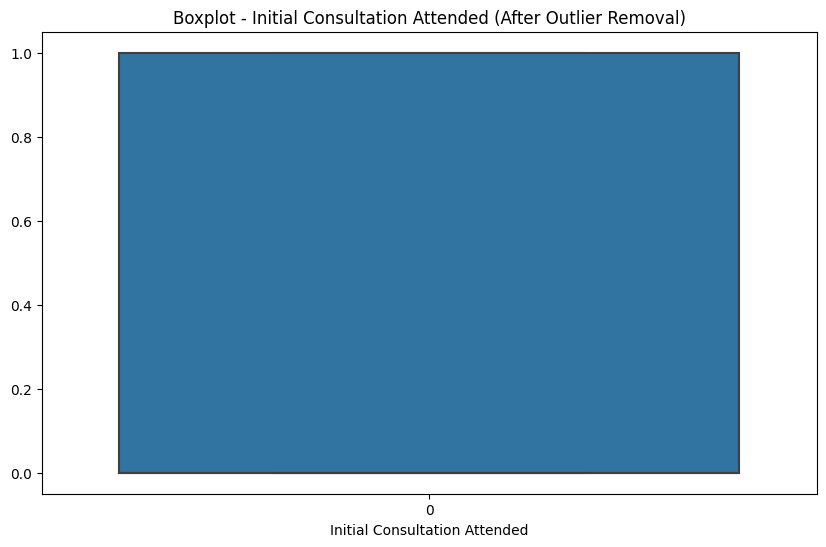

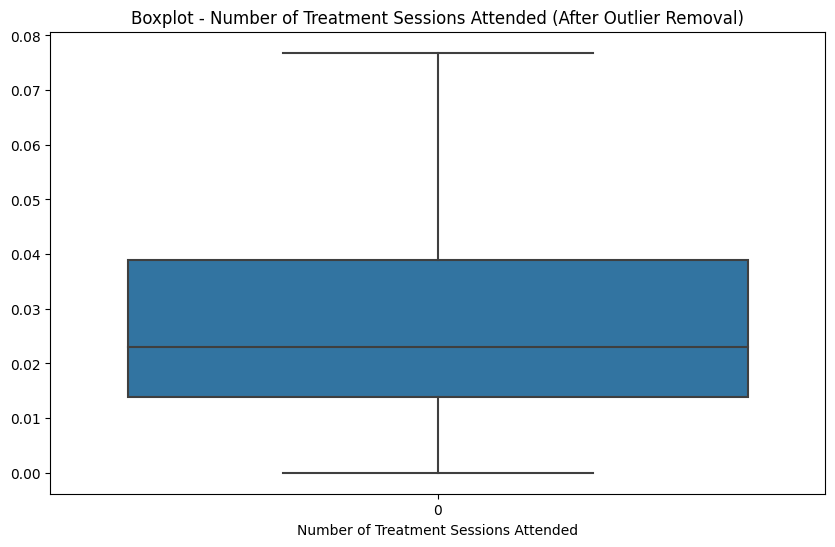

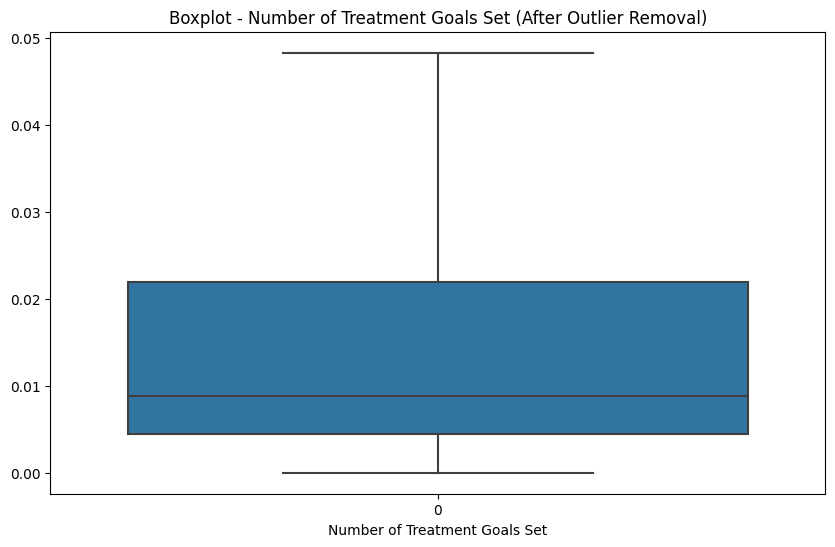

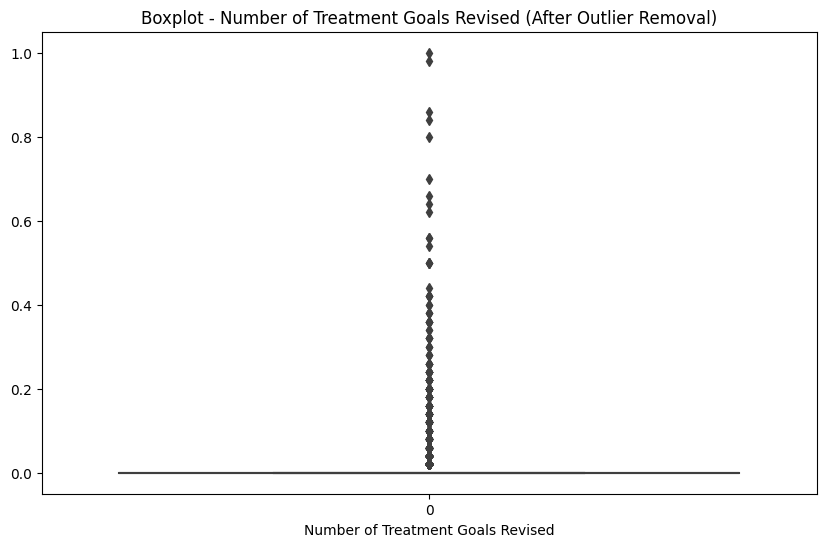

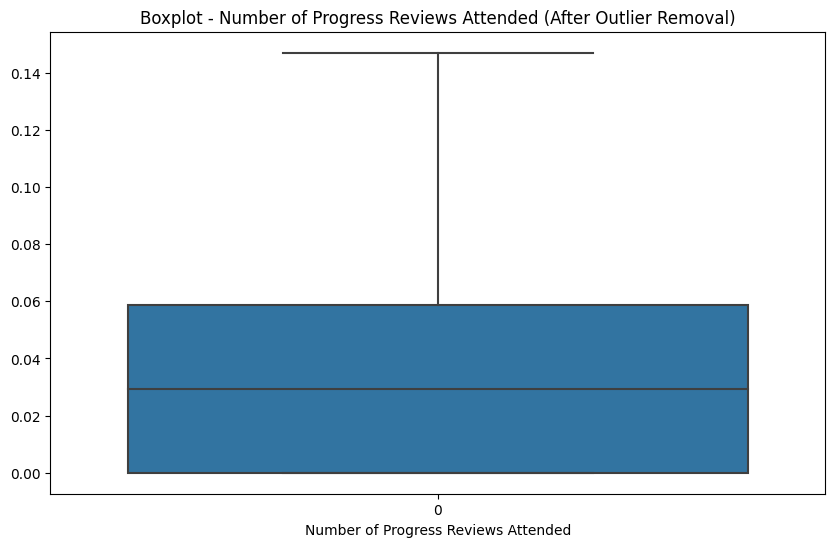

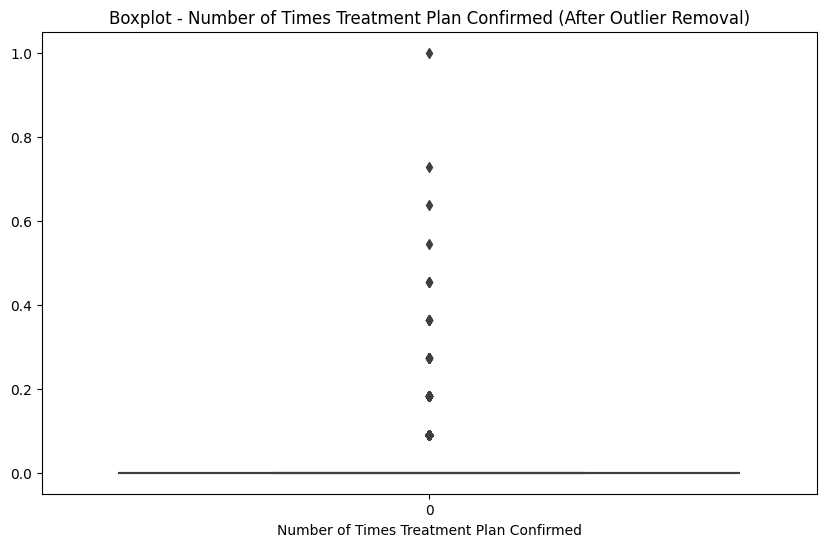

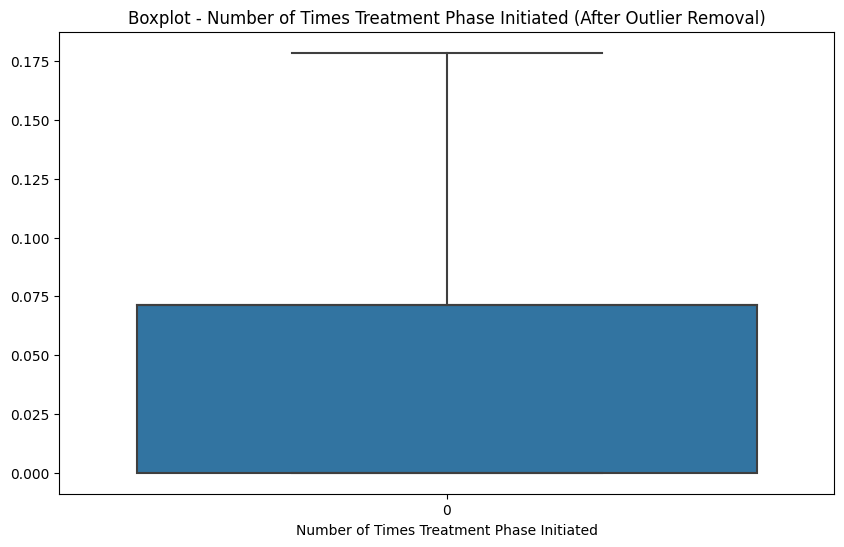

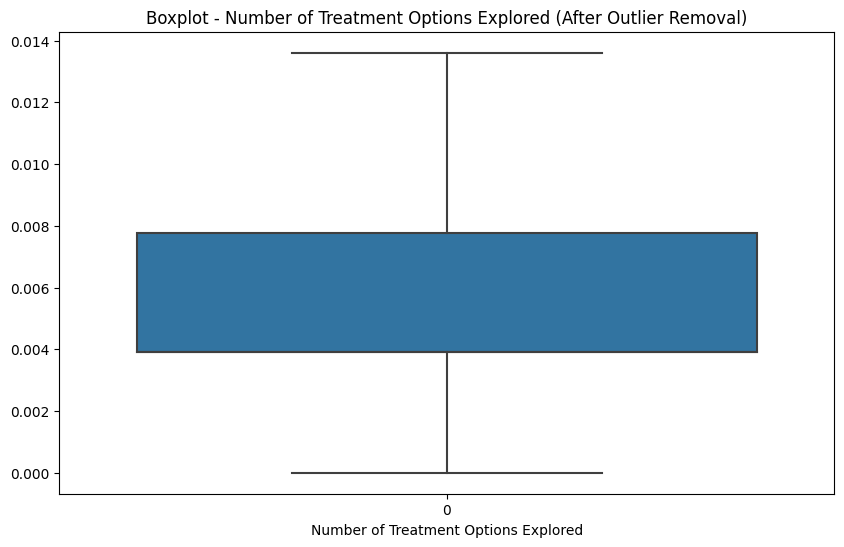

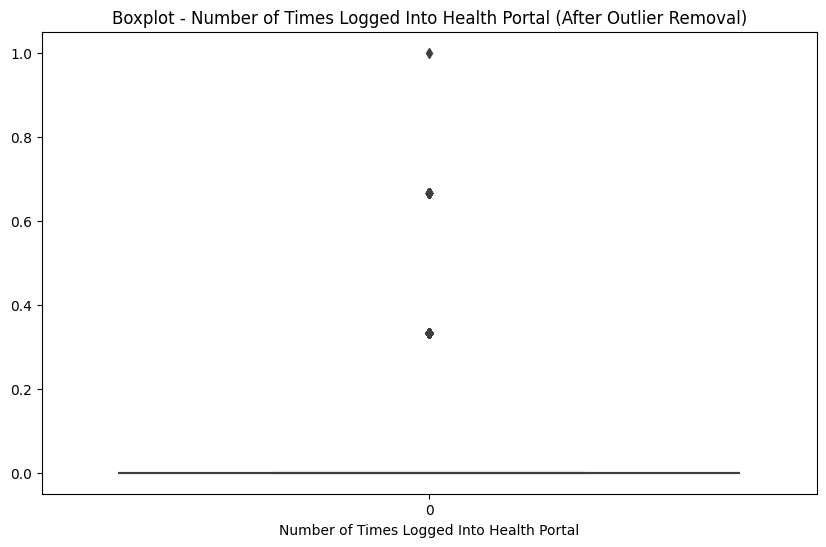

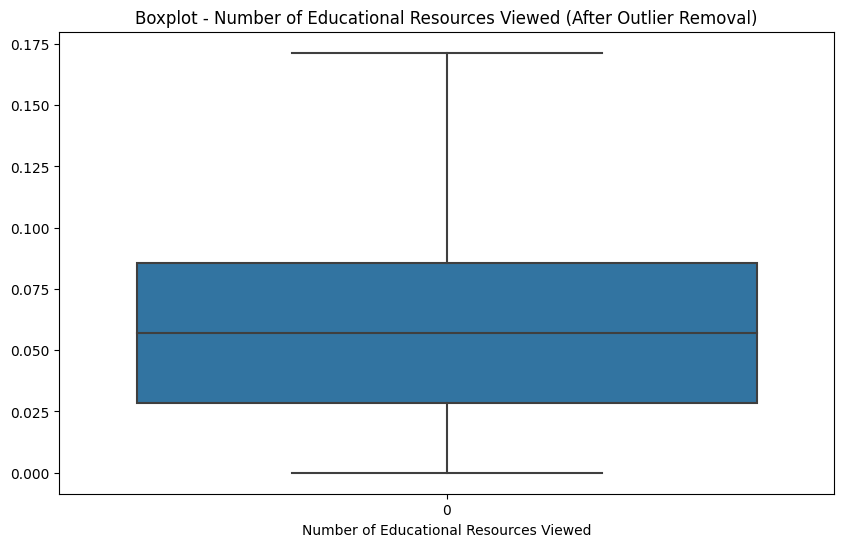

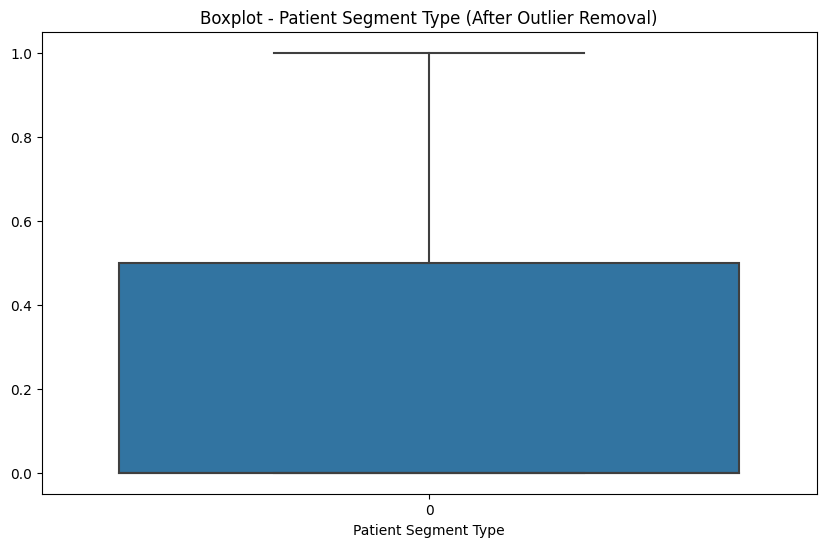

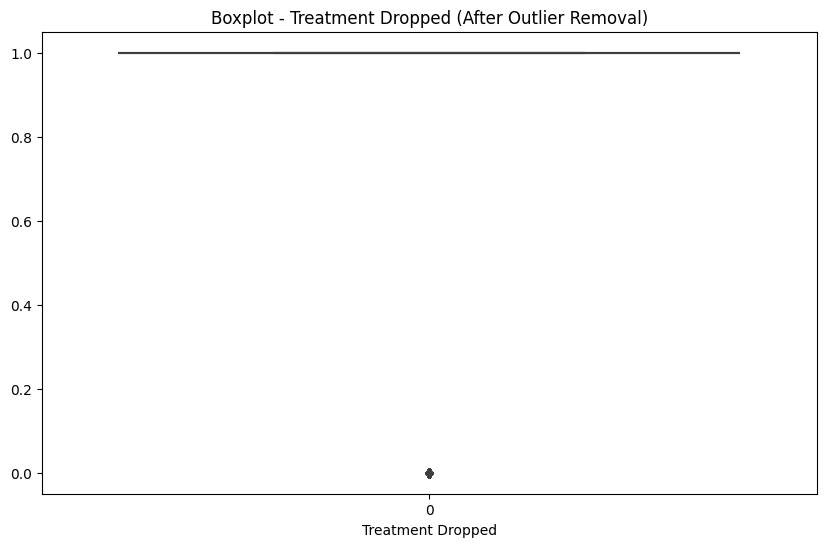

In [59]:
# Boxplot After Removing Outliers
for col in numeric_cols:
    plt.figure(figsize=(10, 6))  # Create a new figure for each column
    sns.boxplot(data=data[col])  # Generate the boxplot for the current column
    plt.title(f'Boxplot - {col} (After Outlier Removal)')  # Set the title
    plt.xlabel(col)  # Add x-axis label
    plt.show()  # Display the plot

# **3.** Feature Engineering 

## **3.1.** Creating New Features

In [60]:
# Create a new DataFrame for the features
data_new = data.copy()

# 1. Creating New Features
# Attendance to Goals Ratio
data_new['Attendance_to_Goals_Ratio'] = data_new['Number of Treatment Sessions Attended'] / (data_new['Number of Treatment Goals Set'] + 1)  # Adding 1 to avoid division by zero

# Count of educational resources viewed per treatment session
data_new['Resources_Per_Session'] = data_new['Number of Educational Resources Viewed'] / (data_new['Number of Treatment Sessions Attended'] + 1)

# Interaction between treatment sessions attended and treatment goals set
data_new['Session_Goal_Interaction'] = data_new['Number of Treatment Sessions Attended'] * data_new['Number of Treatment Goals Set']

## **3.2.** Polynomial Features

In [61]:
# Polynomial Features (to capture non-linear relationships)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data_new.drop(columns=['Treatment Dropped']))
poly_feature_names = poly.get_feature_names_out(data_new.drop(columns=['Treatment Dropped']).columns)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combine the new polynomial features with the original dataset
data_cleaned_poly = pd.concat([pd.DataFrame(poly_features, columns=poly_feature_names), data_new['Treatment Dropped']], axis=1)

## **3.3.** Delete redundant columns

In [62]:
# Drop original columns from the cleaned DataFrame
data_new.drop(columns=[
    'Number of Treatment Sessions Attended',
    'Number of Treatment Goals Set',
    'Number of Educational Resources Viewed'
], inplace=True)

# Display the new features in data_new
print("New features in data_new DataFrame:\n")
data_new.head()

New features in data_new DataFrame:



,Initial Consultation Attended,Number of Treatment Goals Revised,Number of Progress Reviews Attended,Number of Times Treatment Plan Confirmed,Number of Times Treatment Phase Initiated,Number of Treatment Options Explored,Number of Times Logged Into Health Portal,Patient Segment Type,Treatment Dropped,Attendance_to_Goals_Ratio,Resources_Per_Session,Session_Goal_Interaction
0,1,0.00,0.000000,0.000000,0.000000,0.003899,0.0,0.0,1.0,0.009134,0.000000,0.000041
1,0,0.00,0.058824,0.000000,0.000000,0.007782,0.0,0.0,1.0,0.076835,0.053066,0.000000
2,0,0.00,0.000000,0.090909,0.071429,0.003899,0.0,0.5,0.0,0.017954,0.000000,0.000403
3,0,0.00,0.058824,0.000000,0.000000,0.013607,0.0,0.0,1.0,0.013761,0.000000,0.000000
4,1,0.24,0.029412,0.000000,0.000000,0.013607,0.0,1.0,1.0,0.067825,0.000000,0.003434


# **4.** Multicollinearity Handling 

## **4.1.** Identifying Multicollinearity

### **4.1.1.** Correlation Matrix

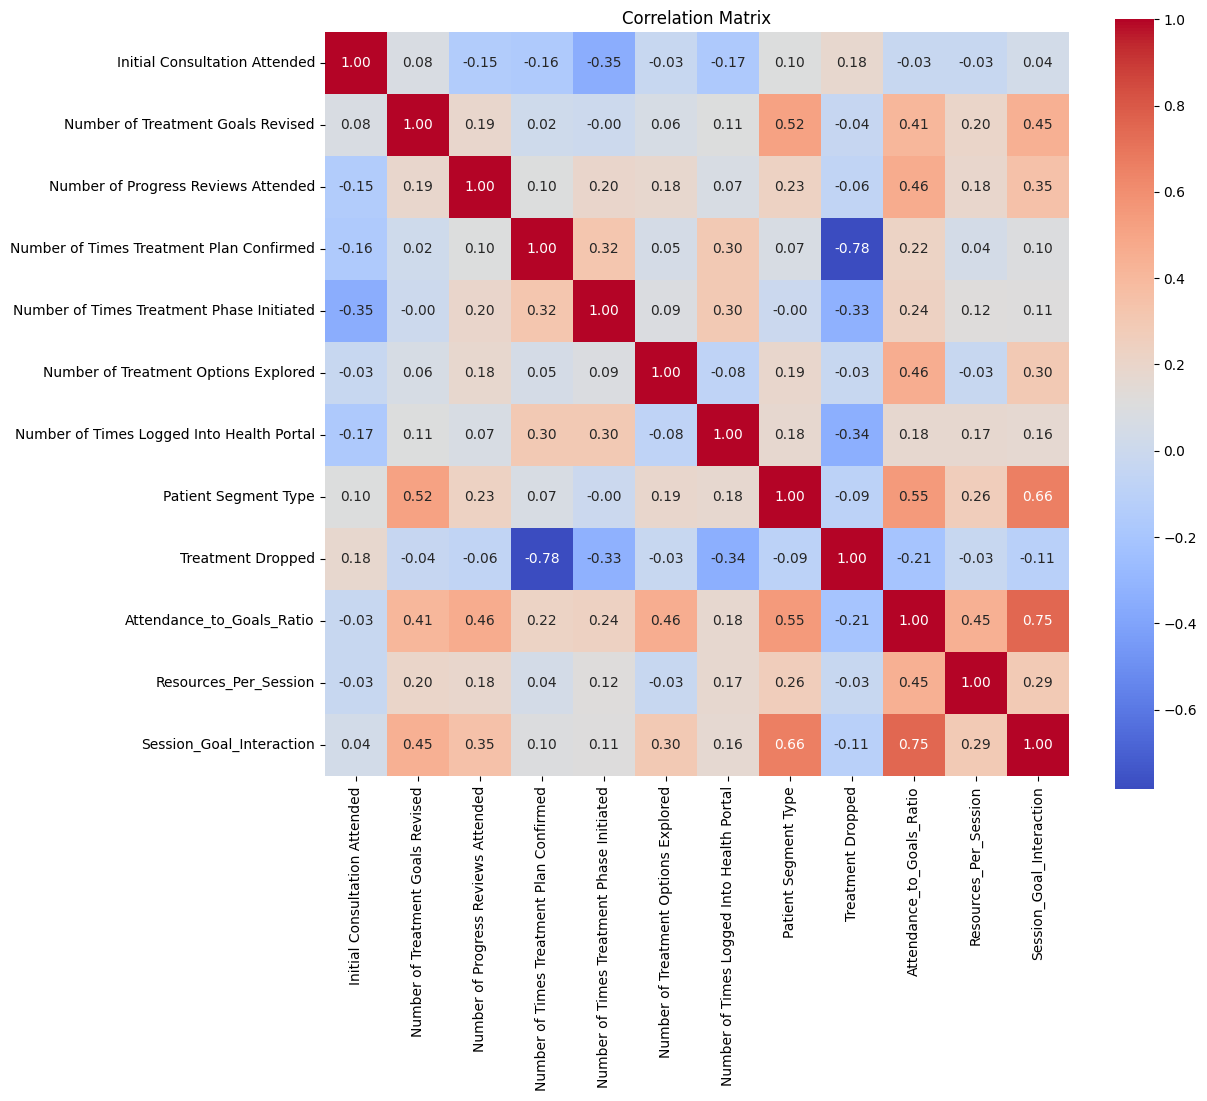

In [63]:
# 1. Correlation Matrix
correlation_matrix = data_new.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## **4.2.** Handling Multicollinearity

### **4.2.1.** Variance Inflation Factor (VIF)

In [64]:
def calculate_and_drop_high_vif_features(data, threshold=10):
    # 1. Selecting Only Numerical Columns
    numerical_data = data.select_dtypes(include=[float, int])

    # 2. Add a constant to the model (required for VIF calculation)
    X = numerical_data.copy()
    X["Intercept"] = 1

    # 3. Calculate VIF for Each Feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # 4. Display VIF Data Excluding the Intercept Term
    vif_data = vif_data[vif_data["Feature"] != "Intercept"]
    print(f"VIF Data for {data.name if hasattr(data, 'name') else 'data'}:\n", vif_data)

    # 5. Automate Dropping High VIF Features
    high_vif_features = vif_data[vif_data["VIF"] > threshold]["Feature"]

    if not high_vif_features.empty:
        print(f"Dropping features with VIF greater than {threshold} from {data.name if hasattr(data, 'name') else 'data'}: {high_vif_features.tolist()}")
        data.drop(columns=high_vif_features.tolist(), inplace=True)

    # 6. Visualize VIF Values
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Feature", y="VIF", data=vif_data)
    plt.xticks(rotation=90)
    plt.title(f"VIF Values of Features in {data.name if hasattr(data, 'name') else 'data'}")
    plt.show()

    return data

### **4.2.2.** Correlation Matrix

VIF Data for New Feature Data:
                                       Feature       VIF
0               Initial Consultation Attended  1.194423
1           Number of Treatment Goals Revised  1.453488
2         Number of Progress Reviews Attended  1.331415
3    Number of Times Treatment Plan Confirmed  2.681628
4   Number of Times Treatment Phase Initiated  1.373951
5        Number of Treatment Options Explored  1.483259
6   Number of Times Logged Into Health Portal  1.273510
7                        Patient Segment Type  2.094959
8                           Treatment Dropped  2.755070
9                   Attendance_to_Goals_Ratio  4.099102
10                      Resources_Per_Session  1.421879
11                   Session_Goal_Interaction  2.975735


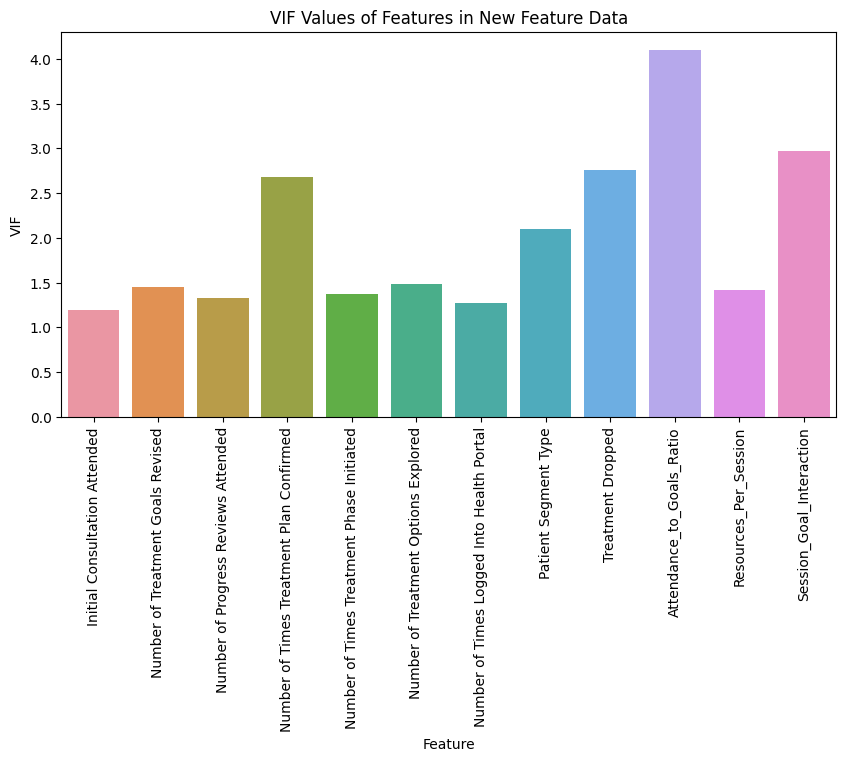

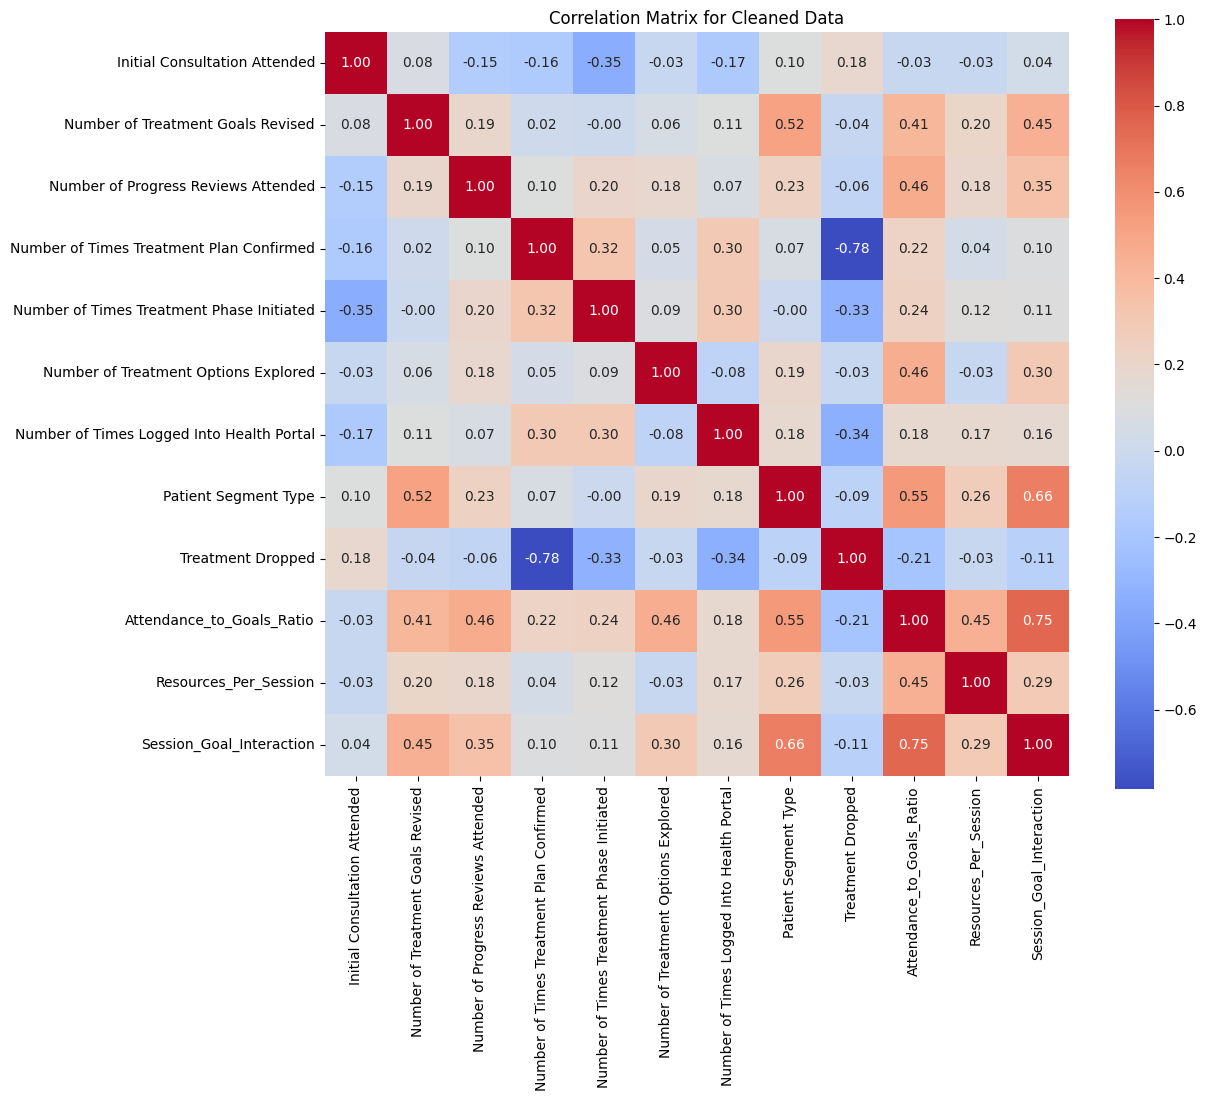

In [65]:
# Set names for easier debugging
data_new.name = "New Feature Data"

# 7. Apply the function to dataset
data_new = calculate_and_drop_high_vif_features(data_new)

# 8. Create and Visualize Correlation Matrix for Cleaned Data
correlation_matrix_new = data_new.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_new, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix for Cleaned Data")
plt.show()

## **4.3.** Downloading cleaned dataset

In [66]:
# Save the DataFrame to a CSV file
data_new.to_csv('dataset_new.csv', index=False)

# For Jupyter Notebook, use this to create a download link
from IPython.display import FileLink

# Create a link to download the CSV file
FileLink('dataset_new.csv')

/kaggle/working/dataset_new.csv

# **5.** Model Building

## **5.1.** Feature Selection

In [67]:
# Define the feature set X and the target variable y
X = data_new.drop(columns=['Treatment Dropped'])  # Features
y = data_new['Treatment Dropped']  # Target variable

# Initialize the Logistic Regression model
model = LogisticRegression(solver='liblinear')

# Specify the desired number of features
rfe = RFE(estimator=model, n_features_to_select=3) 
rfe.fit(X, y)

# Review the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Number of Times Treatment Plan Confirmed',
       'Number of Times Treatment Phase Initiated',
       'Number of Times Logged Into Health Portal'],
      dtype='object')


## **5.2.** Train-Test Split


In [68]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.3, random_state=42)

# Scale the features for better model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **5.3.** Model Fitting

In [69]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Saga supports both L1 and L2
}

# Create the GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from Grid Search
best_params = grid_search.best_params_
print("Best Parameters from Grid Search:", best_params)

# Reinitialize the model with the best parameters
model = LogisticRegression(**best_params)
model.fit(X_train_scaled, y_train)


Best Parameters from Grid Search: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

## **5.4.** K-Fold Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

# Perform K-Fold Cross Validation with 10 folds for more robust evaluation
k = 10
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=k)

# Print the cross-validation scores and the average score
print(f"K-Fold Cross Validation Scores (K={k}): {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.4f}")


K-Fold Cross Validation Scores (K=10): [0.99333333 0.98       0.98666667 0.96666667 0.97       0.98333333
 0.98333333 0.99       0.97658863 0.98327759]
Average CV Score: 0.9813


## **5.5.** Model Evaluation


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])  # AUC for binary classification

# Print evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Model Evaluation Metrics:
Accuracy: 0.9852
Precision: 1.0000
Recall: 0.9827
F1 Score: 0.9913
ROC AUC: 0.9953


# **6.** Conclusion